<a href="https://colab.research.google.com/github/Alex-Mendoza/Data-Science/blob/main/Data_Storytelling_Mendoza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Storytelling**

# **Storytelling and Heart Disease Prediction**



> Clasificación de enfermedades cardíacas con regresión logística
En los Estados Unidos, las enfermedades cardíacas son la principal causa de muerte entre hombres y mujeres, independientemente del grupo racial o étnico.

Una persona muere cada 33 segundos a causa de una enfermedad cardíaca (también conocida como enfermedad cardiovascular), y entre 2018 y 2019, las enfermedades cardíacas le costaron a los Estados Unidos alrededor de 239,9 mil millones de dólares y en 2021 se cobraron aproximadamente 695.000 vidas.

Este cuaderno explorará el conjunto de datos Conjunto de datos de predicción de riesgo de enfermedades cardiovasculares, extraído de kaggle. Originalmente, este conjunto de datos proviene del BFRSS, que es el siguiente: "El Sistema de Vigilancia de Factores de Riesgo de Comportamiento (BRFSS) es el principal sistema nacional de encuestas telefónicas relacionadas con la salud que recopila datos estatales sobre los residentes de EE. UU. con respecto a sus conductas de riesgo relacionadas con la salud, enfermedades crónicas condiciones y uso de servicios preventivos."

Se seleccionaron cuidadosamente 19 variables del conjunto de datos más grande para crear el conjunto de datos actual que estoy usando ahora, y en este conjunto de datos exploraré algunos de los factores clave que contribuyen a que una persona tenga riesgo de sufrir una enfermedad cardíaca y construiré un modelo de predicción usando regresión logística. , datos de entrenamiento y datos de pruebas, para ver si se puede predecir con precisión qué pacientes tienen enfermedades cardíacas basándose únicamente en los síntomas.



# **Tabla de contenido**

1. Introducción
   
    1.1 Librerías y herramientas
2. Cnocimiento y dominio.
3. Hipótesis y preguntas.
4. Atributos


# **Introducción**

*Este proyecto consiste en analizar un conjunto de datos sanitarios con el objetivo de predecir el pronóstico de diversas enfermedades. El conjunto de datos incluye varias características relacionadas con la salud y el estilo de vida de los pacientes, incluida la edad, el sexo, la salud general, la frecuencia de los controles, los hábitos de ejercicio, el historial de tabaquismo y la presencia de diversas enfermedades. Cada entrada representa un paciente único y las características capturan varios factores asociados con el pronóstico de la enfermedad.*

# **Conocimiento y dominio**

Edad: Esta es la edad del paciente. La edad es un factor crucial en el pronóstico de la enfermedad, ya que el riesgo de enfermedades crónicas como enfermedades cardíacas, cáncer, diabetes y artritis aumenta con la edad. Esto se debe a varios factores, incluido el efecto acumulativo de la exposición a factores de riesgo, el mayor desgaste del cuerpo y los cambios en las funciones fisiológicas del cuerpo.

Sexo: Esta característica representa el sexo del paciente. El género puede influir en el pronóstico de la enfermedad debido a las diferencias biológicas y los patrones de estilo de vida específicos del género. Por ejemplo, las enfermedades cardíacas son más comunes en los hombres, mientras que el cáncer de piel es más común en las mujeres. Esto podría deberse a factores como una mayor esperanza de vida o una exposición diferente a los factores de riesgo en cada género.

General_Health: Este es un estado de salud autoevaluado del paciente. Los pacientes que perciben su salud como "Mala" o "Regular" tienen más probabilidades de tener enfermedades crónicas. Esto podría deberse a que los síntomas o el manejo de estas afecciones afectan su estado de salud percibido.

Chequeo: esta característica representa la frecuencia de los chequeos de salud. Los chequeos médicos regulares pueden ayudar en la detección temprana y el manejo de enfermedades, mejorando así el pronóstico.

Ejercicio: esta característica indica si el paciente hace ejercicio con regularidad o no. El ejercicio regular puede ayudar a controlar el peso, reducir el riesgo de enfermedades cardíacas y controlar los niveles de insulina y azúcar en la sangre, entre otros beneficios. Esto se alinea con la correlación negativa observada entre el ejercicio y enfermedades como las enfermedades cardíacas, la diabetes y la artritis.

Smoking_History: esta función indica si el paciente tiene antecedentes de tabaquismo. Fumar puede aumentar el riesgo de enfermedades, ya que puede dañar los vasos sanguíneos, aumentar la presión arterial y reducir la cantidad de oxígeno que llega a los órganos.

# **Hipótesis y preguntas**

Identificar los factores clave del estilo de vida personal y ofrecer información integral sobre su eficacia y capacidades predictivas. Las preguntas de investigación que guían este estudio son las siguientes:

¿Qué atributos personales se identificaron como de mayor impacto en la predicción del riesgo de ECV?

Según el modelo de regresión logística ¿Qué porcentaje de personas con ECV e individuos sanos fueron clasificados correctamente por el Modelo de regresión logística?

¿Qué ideas y conocimientos significativos se pueden obtener al utilizar atributos personales para predecir el riesgo de enfermedades cardiovasculares a través de enfoques de aprendizaje automático?

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.svm import SVC
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras import layers, callbacks
from keras.models import Sequential
from keras.layers import Dense, Dropout
# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDE-AC2Zs1o7sWyQ-DtS0p8xfui9qLDSwjyAlT4MAjcZwixRIfLbgHmmmH_091rSnczMhErtJlGbNx/pub?gid=517522836&single=true&output=csv')

In [ ]:
from google.colab import drive
import os

# Ruta al archivo CSV
file_path = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vRDE-AC2Zs1o7sWyQ-DtS0p8xfui9qLDSwjyAlT4MAjcZwixRIfLbgHmmmH_091rSnczMhErtJlGbNx/pub?gid=517522836&single=true&output=csv'

# Leer el archivo CSV en un DataFrame de pandas
df = pd.read_csv ('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDE-AC2Zs1o7sWyQ-DtS0p8xfui9qLDSwjyAlT4MAjcZwixRIfLbgHmmmH_091rSnczMhErtJlGbNx/pub?gid=517522836&single=true&output=csv')

# Mostrar las primeras filas del DataFrame
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRDE-AC2Zs1o7sWyQ-DtS0p8xfui9qLDSwjyAlT4MAjcZwixRIfLbgHmmmH_091rSnczMhErtJlGbNx/pub?gid=517522836&single=true&output=csv')
df_copy = df
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [ ]:
df.info()

<bound method DataFrame.info of        General_Health                  Checkup Exercise Heart_Disease  \
0                Poor  Within the past 2 years       No            No   
1           Very Good     Within the past year       No           Yes   
2           Very Good     Within the past year      Yes            No   
3                Poor     Within the past year      Yes           Yes   
4                Good     Within the past year       No            No   
...               ...                      ...      ...           ...   
308849      Very Good     Within the past year      Yes            No   
308850           Fair  Within the past 5 years      Yes            No   
308851      Very Good      5 or more years ago      Yes            No   
308852      Very Good     Within the past year      Yes            No   
308853      Excellent     Within the past year      Yes            No   

       Skin_Cancer Other_Cancer Depression  \
0               No           No         No   

In [ ]:
df.shape

(308854, 19)

In [ ]:
list(df.columns)

['General_Health',
 'Checkup',
 'Exercise',
 'Heart_Disease',
 'Skin_Cancer',
 'Other_Cancer',
 'Depression',
 'Diabetes',
 'Arthritis',
 'Sex',
 'Age_Category',
 'Height_(cm)',
 'Weight_(kg)',
 'BMI',
 'Smoking_History',
 'Alcohol_Consumption',
 'Fruit_Consumption',
 'Green_Vegetables_Consumption',
 'FriedPotato_Consumption']

# **Atributos**

**BMI_Category:** 🍏🍔🧮 Esta variable clasifica el IMC (índice de masa corporal) de cada individuo en una de cuatro categorías: 'Bajo peso', 'Peso normal', 'Sobrepeso' y 'Obesidad'. Esto se basa en los siguientes rangos: bajo peso es un IMC inferior a 18,5, peso normal es un IMC de 18,5 a 24,9, sobrepeso es un IMC de 25 a 29,9 y obesidad es un IMC de 30 o superior.


**Checkup_Frequency:** 📅⚕️ Esta variable representa la frecuencia de los controles de salud de cada individuo. Asigna valores numéricos a las diferentes categorías de frecuencia, donde un valor más alto representa controles más frecuentes.


**Lifestyle_Score:** 💪🚬🥦🍷 Esta variable proporciona una puntuación compuesta basada en varios factores del estilo de vida, incluidos el ejercicio, el tabaquismo, el consumo de frutas, el consumo de vegetales verdes y el consumo de alcohol. A cada factor de estilo de vida se le asigna un peso determinado; las actividades positivas, como el ejercicio y la alimentación saludable, contribuyen positivamente a la puntuación, y las actividades negativas, como fumar y el consumo de alcohol, se restan de la puntuación.


**Healthy_Diet_Score:** 🍇🥬🍟 Esta variable calcula una puntuación en función de la dieta del individuo. Considera el consumo de frutas, vegetales verdes y papas fritas. Un mayor consumo de frutas y verduras verdes suma positivamente a la puntuación, mientras que el consumo de patatas fritas resta puntuación.


**Smoking_Alcohol / Fumar_Alcohol/:** 🚬🍺 Este término de interacción representa la combinación de fumar y consumir alcohol. Multiplica los valores mapeados de historial de tabaquismo y consumo de alcohol.


**Checkup_Exercise / Chequeo_Ejercicio:** 🏋️‍♀️🩺 Este término de interacción representa la combinación de frecuencia de controles de salud y hábitos de ejercicio. Multiplica los valores mapeados de frecuencia de controles de salud y hábitos de ejercicio.


**Height_to_Weight / Altura a peso:** 👫⚖️ Esta variable calcula la relación entre la altura de un individuo y su peso.


**Fruit_Vegetables / Frutas_Verduras:** 🍏🥦 Este término de interacción representa el consumo combinado de frutas y verduras. Multiplica los valores del consumo de frutas y el consumo de vegetales verdes.


**Depression_Exercise / Depresión_Ejercicio:** 😞🏃‍♀️ Este término de interacción representa la combinación del estado de depresión y los hábitos de ejercicio. Multiplica los valores mapeados de estado de depresión y hábitos de ejercicio.


**HealthyDiet_Lifestyle / Estilo de vida_dieta saludable:** 🥗💃 Este término de interacción representa la combinación de Healthy Diet Score y Lifestyle Score. Multiplica los valores de estas dos puntuaciones.


**Alcohol_FriedPotato / Alcohol_Papas fritas:** 🍺🍟 Este término de interacción representa el consumo combinado de alcohol y patatas fritas. Multiplica los valores del consumo de alcohol y el consumo de patatas fritas.


In [ ]:
# Mapping for Diabetes
diabetes_mapping = {
    'No': 0,
    'No, pre-diabetes or borderline diabetes': 0,
    'Yes, but female told only during pregnancy': 1,
    'Yes': 1
}
df['Diabetes'] = df['Diabetes'].map(diabetes_mapping)

# One-hot encoding for Sex
#df = pd.read_csv(df,['Sex'])

# Convert remaining categorical variables with "Yes" and "No" values to binary format for correlation computation
binary_columns = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History','Exercise']

for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Ordinal encoding for General_Health, Checkup, Age_Category
general_health_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Excellent': 4
}
df['General_Health'] = df['General_Health'].map(general_health_mapping)

checkup_mapping = {
    'Never': 0,
    '5 or more years ago': 0.2,
    'Within the past 5 years': 1,
    'Within the past 2 years': 2,
    'Within the past year': 4

}
df['Checkup'] = df['Checkup'].map(checkup_mapping)


age_category_mapping = {
    '18-24': 0,
    '25-29': 1,
    '30-34': 2,
    '35-39': 3,
    '40-44': 4,
    '45-49': 5,
    '50-54': 6,
    '55-59': 7,
    '60-64': 8,
    '65-69': 9,
    '70-74': 10,
    '75-79': 11,
    '80+': 12
}
df['Age_Category'] = df['Age_Category'].map(age_category_mapping)


# Display the first few rows of the cleaned dataset
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,2.0,0,0,0,0,0,0,1,Female,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,4.0,0,1,0,0,0,1,0,Female,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,4.0,1,0,0,0,0,1,0,Female,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,4.0,1,1,0,0,0,1,0,Male,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,2,4.0,0,0,0,0,0,0,0,Male,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [ ]:
data = df.drop_duplicates()

<ipython-input-36-ca161c8b7df2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


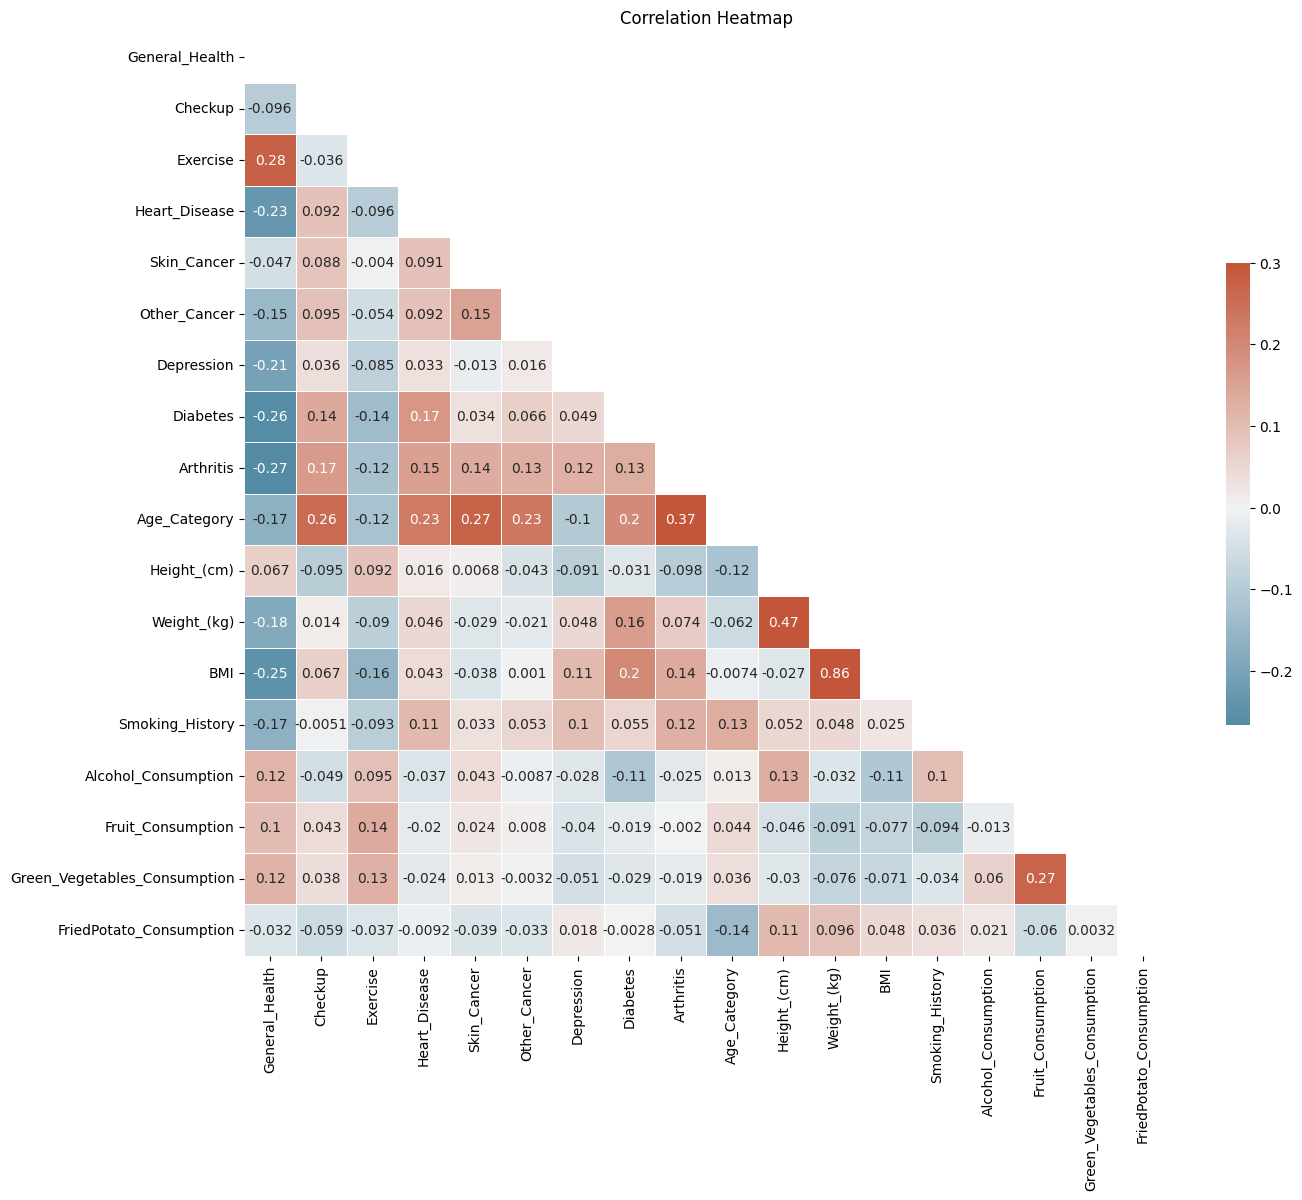

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(15, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Heatmap')
plt.show()

<ipython-input-37-53c7ccb07990>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


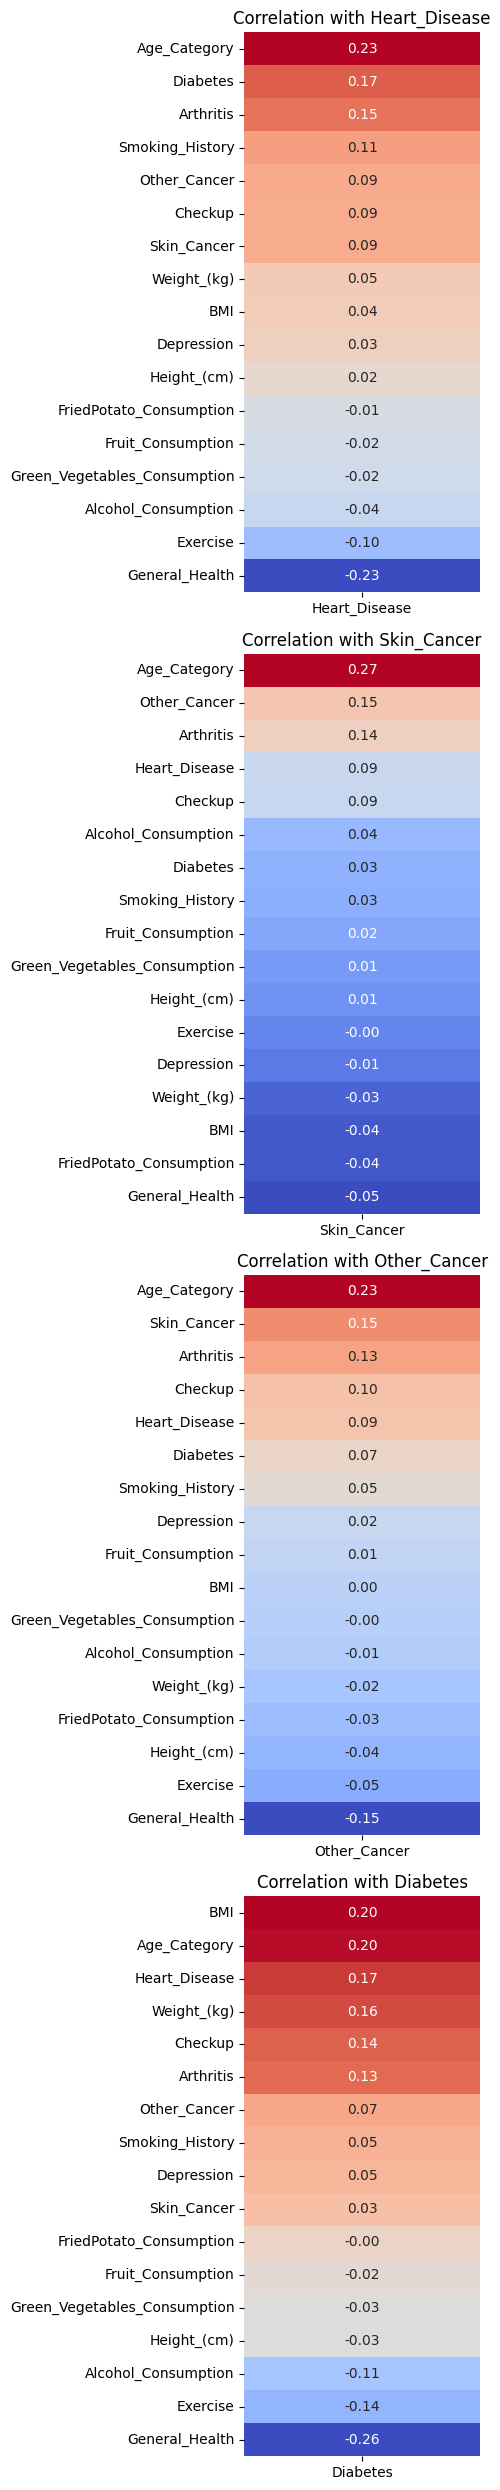

In [ ]:
disease_variables = ['Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Diabetes']

# Calcular la matriz de correlación
corr = df.corr()

# Crea una subtrama para cada enfermedad.
fig, axs = plt.subplots(len(disease_variables), 1, figsize=(5, 25))

for ax, disease in zip(axs, disease_variables):
    # Calcular la correlación con la enfermedad.
    target_corr = corr[disease].drop(disease)

    # Ordenar los valores de correlación en orden descendente
    target_corr_sorted = target_corr.sort_values(ascending=False)

    # Trazar un mapa de calor de las correlaciones con la enfermedad.
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f', cbar=False, ax=ax)
    ax.set_title('Correlation with ' + disease)

plt.tight_layout()
plt.show()

# **Interpretación del resultado**

📊 Los mapas de calor de correlación muestran la correlación de cada característica con las cinco variables de enfermedad: Heart_Disease, Skin_Cancer, Other_Cancer, Diabetes y Arthritis.

🔎 **De los mapas de calor podemos observar lo siguiente:**

❤️ **Heart_Disease / Enfermedad cardíaca:** esta condición muestra una fuerte correlación positiva con Age_Category y General_Health, y una correlación negativa con Ejercicio y Sex_Female.

🌞 **Skin_Cancer /  Cáncer de piel:** esta condición está fuertemente correlacionada positivamente con Age_Category y Sex_Male, y negativamente con Sex_Female.

🦀 **Otro_Cáncer:** esta condición muestra una fuerte correlación positiva con Age_Category/Categoría_edad y General_Health/Salud_general, y una correlación negativa con Sex_Female/Sexo_femenino.

🩸 **Diabetes:** esta afección muestra una fuerte correlación positiva con la Age_Category/Categoría de edad, la General_Health/Salud_general y el IMC, y una correlación negativa con el Excercise/Ejercicio.